In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#loading the dataset
data=pd.read_csv("C:/Users/DEEPIKA/Downloads/archive (3)/advertising.csv")

In [3]:
#loading the top five record
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#loading the bottom five record
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
#displaying the size of dataset
data.size

800

In [6]:
data.ndim

2

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
data.shape

(200, 4)

In [10]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [12]:
data.isnull().sum

<bound method DataFrame.sum of         TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]>

In [13]:
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [14]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [15]:
X=data.iloc[:,1:14]
X

,Radio,Newspaper,Sales
0,37.8,69.2,22.1
1,39.3,45.1,10.4
2,45.9,69.3,12.0
3,41.3,58.5,16.5
4,10.8,58.4,17.9
...,...,...,...
195,3.7,13.8,7.6
196,4.9,8.1,14.0
197,9.3,6.4,14.8
198,42.0,66.2,25.5


In [16]:
Y=data.iloc[:,-1]
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [17]:
 #visualizing the dataset using differnet type of graph for better understanding

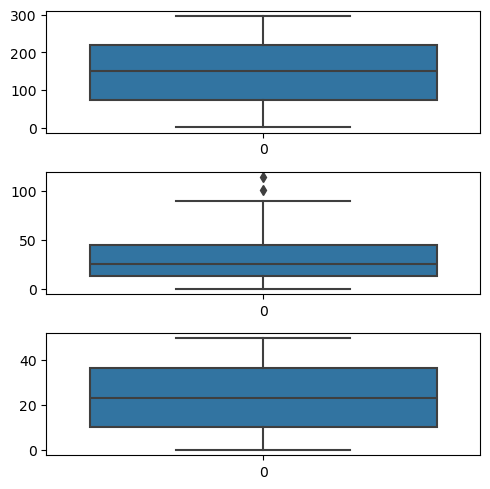

In [18]:
fig, axs = plt.subplots(3,figsize = (5,5))
plt1 = sns.boxplot(data['TV'],ax = axs[0])
plt1 = sns.boxplot(data['Newspaper'],ax = axs[1])
plt1 = sns.boxplot(data['Radio'],ax = axs[2])
plt.tight_layout()

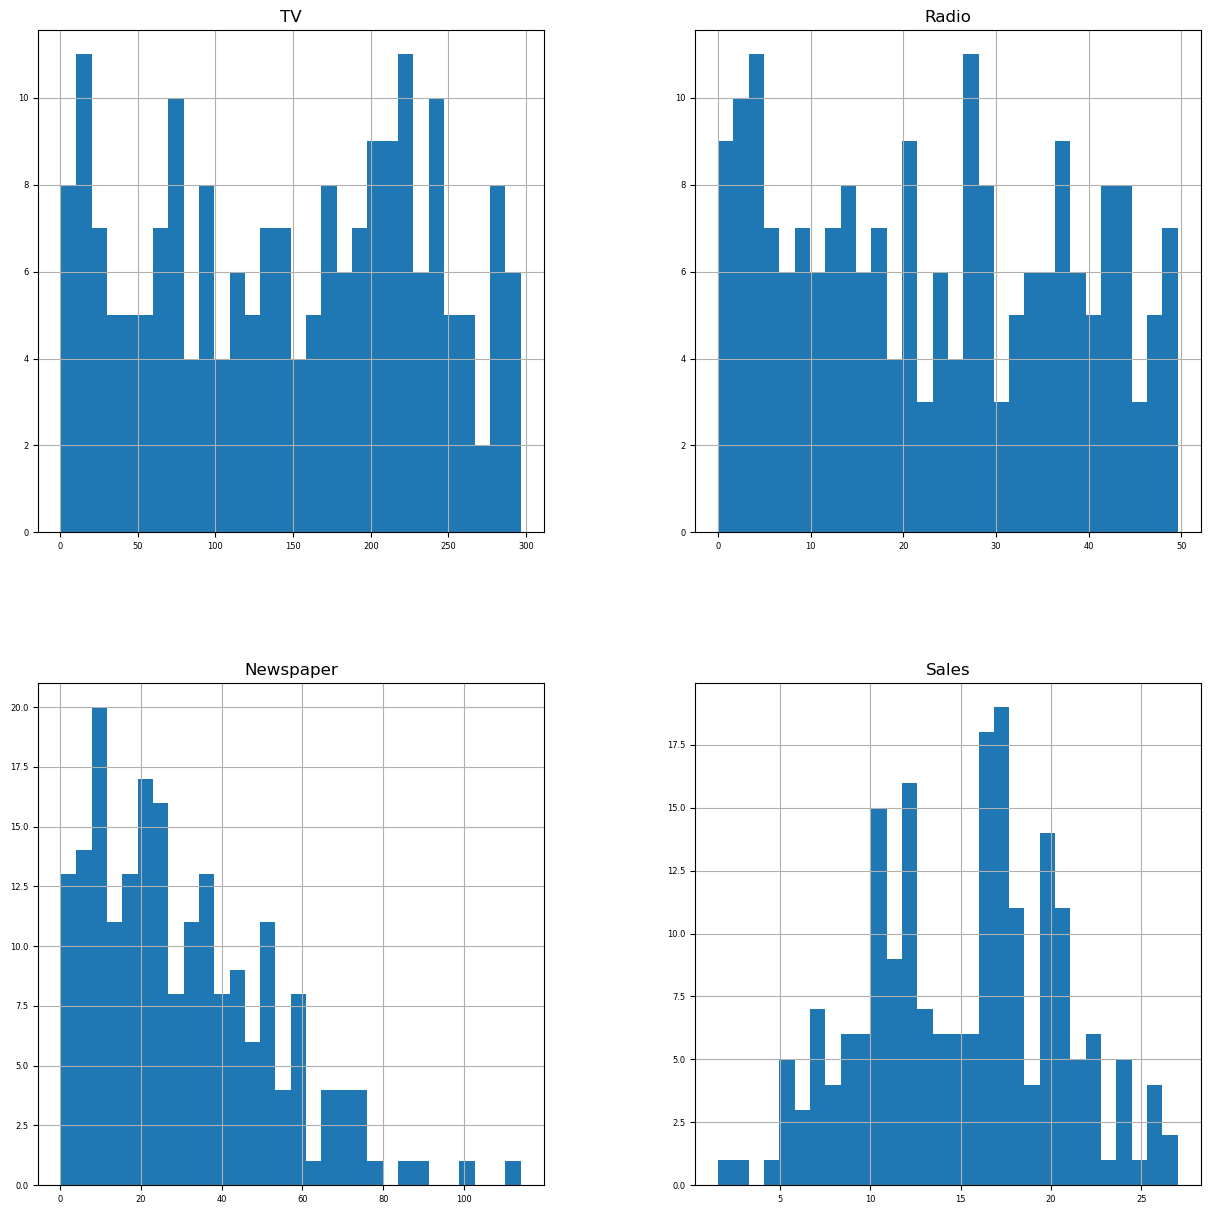

In [19]:
data.hist(figsize=(15,15),bins=30,xlabelsize=6,ylabelsize=6);

C:\Users\DEEPIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


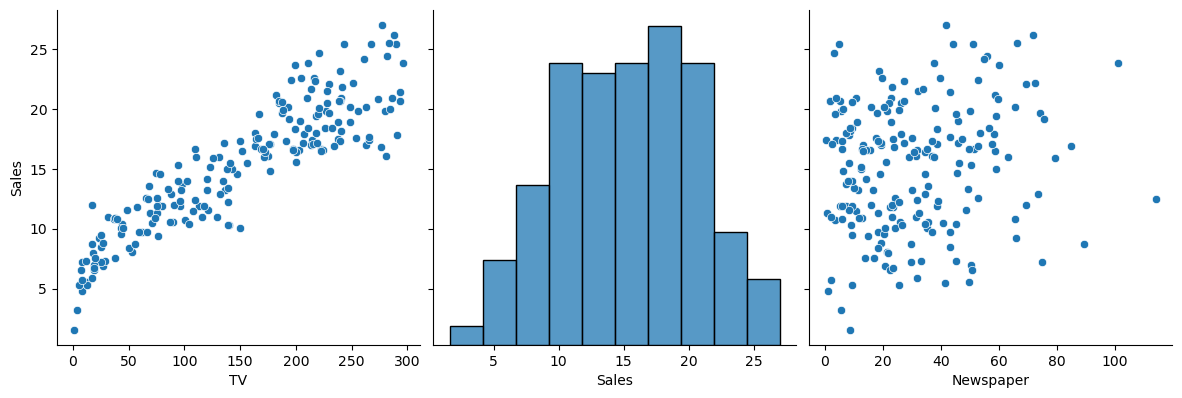

In [20]:
sns.pairplot(data,x_vars=['TV','Sales','Newspaper'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

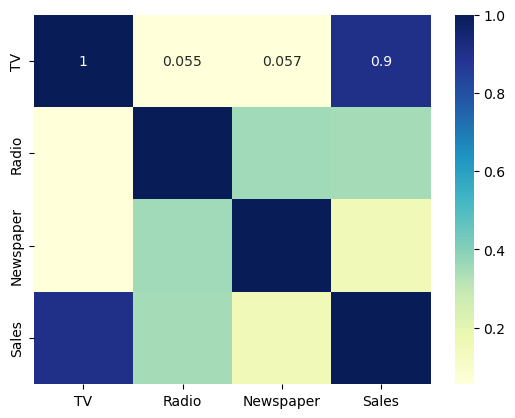

In [21]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot = True)
plt.show()

<Axes: ylabel='Frequency'>

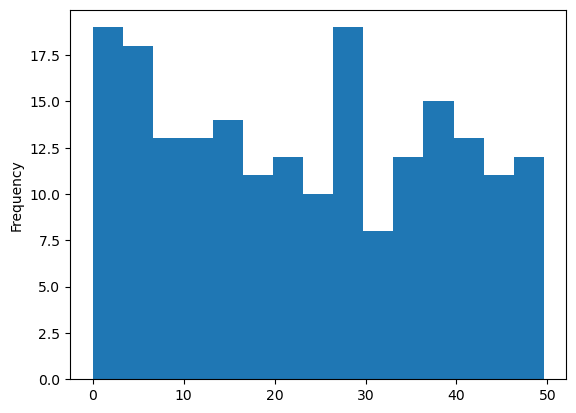

In [22]:
data['Radio'].plot.hist(bins=15)

<Axes: ylabel='count'>

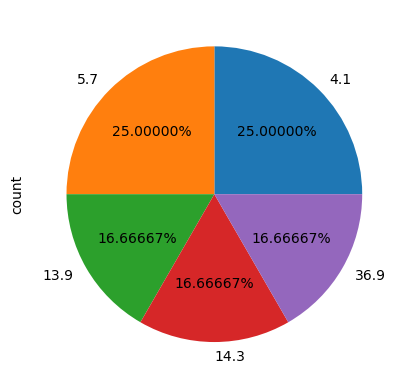

In [23]:
data['Radio'].value_counts().head().plot(kind = 'pie',autopct = '%5.5f%%')

C:\Users\DEEPIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DEEPIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DEEPIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DEEPIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

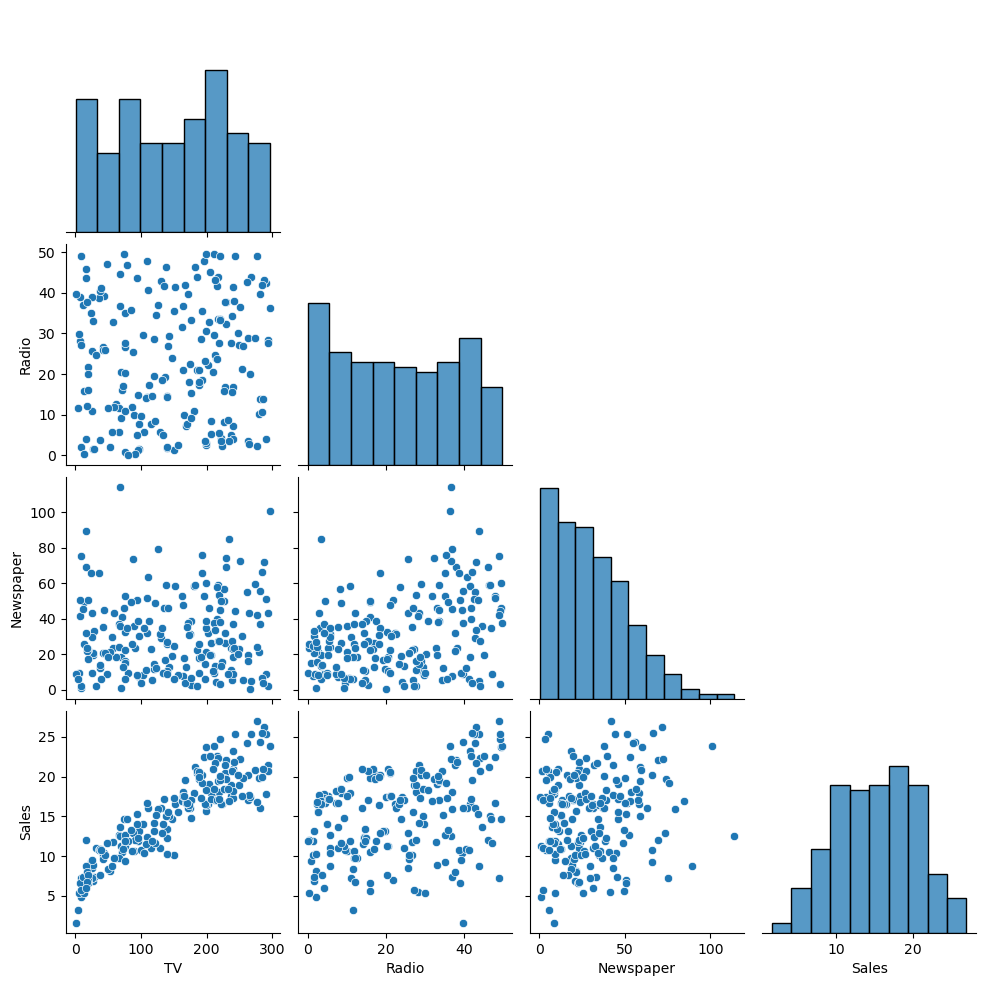

In [24]:
sns.pairplot(data,corner=True)

C:\Users\DEEPIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


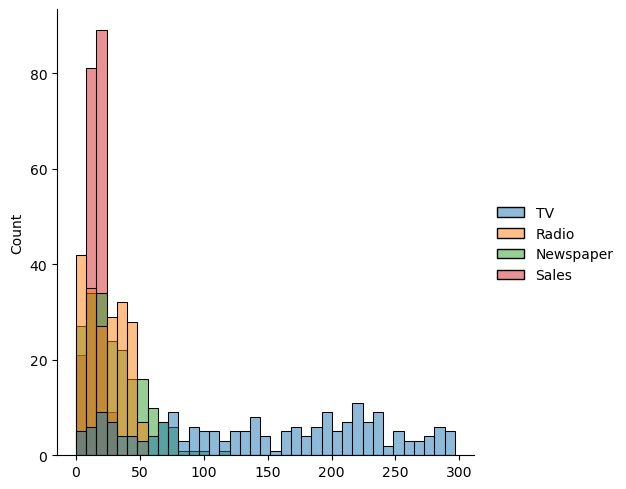

In [25]:
sns.displot(data)

<Axes: xlabel='newpaper', ylabel='Frequency'>

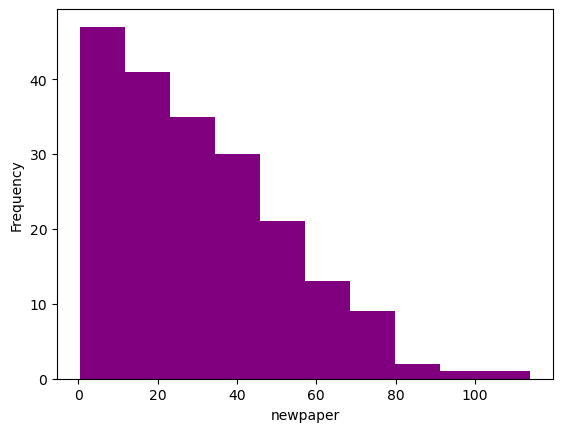

In [26]:
data['Newspaper'].plot.hist(bins=10,color="purple",xlabel="newpaper")

In [27]:
#standardscalar().this function is used to standardize the dat values into a standard format.

In [28]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
data['Sales']=Sc.fit_transform(pd.DataFrame(data['Sales']))

In [29]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,1.322319
1,44.5,39.3,45.1,-0.897515
2,17.2,45.9,69.3,-0.593948
3,151.5,41.3,58.5,0.259834
4,180.8,10.8,58.4,0.525455


In [30]:
data.shape

(200, 4)

In [31]:
#checking whether duplicate value are present
data.duplicated().any()

False

In [32]:
#creating a Logistic regression
#modelling
from sklearn.model_selection import train_test_split

In [33]:
#splitting the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(80, 3)
(120,)
(80,)


In [34]:
X_train

,Radio,Newspaper,Sales
12,35.1,65.9,9.2
16,36.6,114.0,12.5
101,36.3,100.9,23.8
120,26.8,46.2,15.5
45,22.5,31.5,16.1
...,...,...,...
87,40.6,63.2,16.0
103,17.2,17.9,19.7
67,14.5,10.2,13.4
24,12.6,18.3,9.7


In [35]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
       ... 
146    18.2
199    18.4
10     12.6
20     18.0
165    16.9
Name: Sales, Length: 80, dtype: float64

In [36]:
#linear regression
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

In [37]:
Lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_predic=Lr.predict(X_test)

In [39]:
y_predic

array([ 6.6, 20.7, 17.2, 19.4, 21.8, 17.2, 12.2, 16.7, 22.6, 22.3, 11.9,
       19.7,  8.7, 20.6, 10.6, 14. , 17.3, 16.7, 18. , 11.9, 17.4, 11. ,
       22.4, 17.1, 20.5, 24.7, 19.6, 11.3, 20.7, 15.2, 13.6, 11.3, 11.6,
       19.9,  8.4, 14.2, 13.2, 16.7, 16.5, 20.2, 17.1, 17.1, 17.5, 17.2,
       13.2, 10.6,  8.7, 18.9, 10.5,  7.6, 16.6, 16. , 12.6, 16. , 18.4,
       10.4,  5.9,  9.5, 16.6, 13.3, 17. , 16.5, 22.6, 15. , 14. , 11.9,
       17.3, 12.9,  6.6, 18.4, 13.2,  8.5, 10.9, 16.4, 16.7, 18.2, 18.4,
       12.6, 18. , 16.9])

In [40]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
       ... 
146    18.2
199    18.4
10     12.6
20     18.0
165    16.9
Name: Sales, Length: 80, dtype: float64

In [54]:
Lr.coef_

array([ 3.68255760e-17, -2.77555756e-17,  1.00000000e+00])

In [55]:
Lr.intercept_

-3.552713678800501e-15

In [53]:
#checking the performance of regression model....

In [42]:
#mean squared error(mse)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predic)
mse

1.3805065841367707e-30

In [43]:
#mean asbsolute error(mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_predic)
mae

5.995204332975846e-16

In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predic)
r2

1.0